# Stats and Public Health Part 2

**Data Analysis**
Now that you are familiar with the data, we will move on to a set of analyses on the relationship between the different variables and the mosquito number, as well as the probability of findin  West Nile Virus(WN  at any particular time and location.

For this deliverable, you must use the provided cleaned dataset which differs from that for Part 1. Download the data here.

Part 1 - Basic Ana:
lysis
Convert the WNV Present column into a binary column and create dummy variables from the Trap type column.

What is the average number of mosquitoes for each month? What trends do you notice?

Part 2 - Statistical Analysis
Is there a statistically significant difference between the different mosquito species when looking at the occurrence of West Nile Virus?

Which columns are positively correlated with the number of mosquitoes caught? Which columns are negatively correlated? Are these correlations statistically significant?

Part 3 - Advanced Statistical Analysis
Run a linear regression to determine how the independent variables affect the number of mosquitoes caught. Explain your model construction process. Analyze the model and the results and discuss the model’s limitations. This may end up being an iterative process.
Note:

You will likely see a low R^2 value, that is to be expected.
This dataset does not respond well to performing VIF analysis, so this is not required.
WNV Present must not be one of your independent variables.
Run a logistic regression to determine how the independent variables affect West Nile Virus presence. Explain your model construction process. Analyze the model and the results and discuss the model’s limitations. This may end up being an iterative process.
Note: Mosquito number should be one of your independent variables.

Requirements
Please submit your Jupyter notebook which should include commented code and markdown cells explaining your methodology and findings.

### Looking at the Data

In [1]:
# import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels as sm

In [2]:
# Read in the data (csv) to a DataFrame
mosquito_df2 = pd.read_csv('/Users/jprna/Documents/BrainStation/Bootcamp_Files/Pandas/data/mosquito_data_part_2.csv')

In [3]:
# Take a look at the column names and 5 first row
mosquito_df2.head(5)

,Year,Week,Address Block,Trap,Trap type,Date,Mosquito number,WNV Present,Species,Lat,Lon,Month
0,2019,39,100XX W OHARE AIRPORT,T910,GRAVID,2019-09-26 00:09:00,2,negative,CULEX RESTUANS,41.977738,-87.880969,9
1,2019,39,52XX S KOLMAR AVE,T114,GRAVID,2019-09-26 00:09:00,1,negative,CULEX RESTUANS,41.798211,-87.736925,9
2,2019,39,58XX N WESTERN AVE,T028,GRAVID,2019-09-26 00:09:00,2,negative,CULEX RESTUANS,41.987245,-87.689417,9
3,2019,39,39XX N SPRINGFIELD AVE,T228,GRAVID,2019-09-26 00:09:00,1,negative,CULEX RESTUANS,41.953664,-87.724987,9
4,2019,39,131XX S BRANDON AVE,T209,GRAVID,2019-09-26 00:09:00,9,negative,CULEX RESTUANS,41.657069,-87.546049,9


In [4]:
# Sorting the Year then the Month
mosquito_df2 = mosquito_df2.sort_values(['Year', 'Month'], ascending=True)

In [5]:
# Sorting the Year then the Month
mosquito_df2.head(20)

,Year,Week,Address Block,Trap,Trap type,Date,Mosquito number,WNV Present,Species,Lat,Lon,Month
15479,2007,21,25XX W GRAND AVE,T046,CDC,2007-05-29 00:05:00,1,negative,CULEX RESTUANS,41.892220,-87.691698,5
15480,2007,21,2XX W 89TH ST,T096,CDC,2007-05-29 00:05:00,1,negative,CULEX PIPIENS,41.732428,-87.631056,5
15481,2007,21,15XX W WEBSTER AVE,T045,GRAVID,2007-05-29 00:05:00,2,negative,CULEX RESTUANS,41.921705,-87.666963,5
15482,2007,21,22XX W 113TH ST,T087,GRAVID,2007-05-29 00:05:00,1,negative,CULEX RESTUANS,41.688193,-87.676873,5
15483,2007,21,5XX N STREETER DR,T129,GRAVID,2007-05-29 00:05:00,2,negative,CULEX RESTUANS,41.891513,-87.609785,5
15484,2007,21,22XX N CANNON DR,T054,GRAVID,2007-05-29 00:05:00,3,negative,CULEX RESTUANS,41.922512,-87.632378,5
15485,2007,21,17XX W 95TH ST,T094,GRAVID,2007-05-29 00:05:00,3,negative,CULEX RESTUANS,41.721288,-87.665236,5
15486,2007,21,2XX W 89TH ST,T096,CDC,2007-05-29 00:05:00,5,negative,CULEX RESTUANS,41.732428,-87.631056,5
15487,2007,21,15XX N LONG AVE,T153,GRAVID,2007-05-29 00:05:00,1,negative,CULEX RESTUANS,41.909340,-87.761078,5
15488,2007,21,119XX S PEORIA ST,T091,GRAVID,2007-05-29 00:05:00,1,negative,CULEX RESTUANS,41.677032,-87.644465,5


In [6]:
# Take a look at the 5 bottom if sorting done properly
mosquito_df2.tail(5)

,Year,Week,Address Block,Trap,Trap type,Date,Mosquito number,WNV Present,Species,Lat,Lon,Month
17904,2019,37,70XX W ARMITAGE AVE,T151,GRAVID,2019-09-12 00:09:00,8,positive,CULEX RESTUANS,41.916138,-87.801089,9
17977,2019,37,70XX W ARMITAGE AVE,T151,GRAVID,2019-09-12 00:09:00,8,positive,CULEX RESTUANS,41.916136,-87.801088,9
17997,2019,37,45XX N CAMPBELL AVE,T220,GRAVID,2019-09-12 00:09:00,8,positive,CULEX RESTUANS,41.964415,-87.691369,9
18144,2019,37,45XX N CAMPBELL AVE,T220,GRAVID,2019-09-12 00:09:00,8,positive,CULEX RESTUANS,41.964411,-87.691363,9
18204,2019,37,45XX N CAMPBELL AVE,T220,GRAVID,2019-09-12 00:09:00,8,positive,CULEX RESTUANS,41.964406,-87.691367,9


It seem the sort is done properly.

In [7]:
# Get the DataFrame statistics summary
mosquito_df2.describe()

,Year,Week,Mosquito number,Lat,Lon,Month
count,18495.000000,18495.000000,18495.000000,18495.000000,18495.000000,18495.000000
mean,2012.905812,31.004001,10.879913,41.852599,-87.712611,7.627088
std,3.725857,4.332020,13.475066,0.115419,0.095409,0.998079
min,2007.000000,20.000000,1.000000,41.644720,-87.880969,5.000000
25%,2010.000000,28.000000,2.000000,41.754148,-87.778235,7.000000
50%,2013.000000,31.000000,5.000000,41.872873,-87.703105,8.000000
75%,2016.000000,34.000000,14.000000,41.970102,-87.643076,8.000000
max,2019.000000,40.000000,50.000000,42.017801,-87.531051,10.000000


Looking at the count row it seems there is no null values. Each column has the same
number of data.

In [8]:
# Check the summary of column datatypes
mosquito_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18495 entries, 15479 to 18204
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             18495 non-null  int64  
 1   Week             18495 non-null  int64  
 2   Address Block    18495 non-null  object 
 3   Trap             18495 non-null  object 
 4   Trap type        18495 non-null  object 
 5   Date             18495 non-null  object 
 6   Mosquito number  18495 non-null  int64  
 7   WNV Present      18495 non-null  object 
 8   Species          18495 non-null  object 
 9   Lat              18495 non-null  float64
 10  Lon              18495 non-null  float64
 11  Month            18495 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 1.8+ MB


Noticed that the 'Date' column is an object. Will convert it to have the 
proper datatype.

In [9]:
# Convert the date into a datetime but removing the time
mosquito_df2['Date'] = pd.to_datetime(mosquito_df2['Date']).dt.date.astype('datetime64[ns]')
mosquito_df2.head(3)

,Year,Week,Address Block,Trap,Trap type,Date,Mosquito number,WNV Present,Species,Lat,Lon,Month
15479,2007,21,25XX W GRAND AVE,T046,CDC,2007-05-29,1,negative,CULEX RESTUANS,41.892220,-87.691698,5
15480,2007,21,2XX W 89TH ST,T096,CDC,2007-05-29,1,negative,CULEX PIPIENS,41.732428,-87.631056,5
15481,2007,21,15XX W WEBSTER AVE,T045,GRAVID,2007-05-29,2,negative,CULEX RESTUANS,41.921705,-87.666963,5


In [10]:
# Check for any null
mosquito_df2.isna().any()

Year               False
Week               False
Address Block      False
Trap               False
Trap type          False
Date               False
Mosquito number    False
WNV Present        False
Species            False
Lat                False
Lon                False
Month              False
dtype: bool

In [11]:
# Check if there are duplicated rows
mosquito_df2[mosquito_df2.duplicated()]

,Year,Week,Address Block,Trap,Trap type,Date,Mosquito number,WNV Present,Species,Lat,Lon,Month
15613,2007,34,79XX S CHICAGO,T083,GRAVID,2007-08-24,14,positive,CULEX PIPIENS,41.754484,-87.590741,8
15885,2007,31,65XX N OAK PARK AVE,T143,GRAVID,2007-08-07,29,positive,CULEX PIPIENS,41.999263,-87.795545,8
15941,2007,31,115XX S AVENUE L,T103,GRAVID,2007-08-08,50,positive,CULEX PIPIENS,41.686560,-87.536349,8
16345,2007,34,79XX S CHICAGO,T083,GRAVID,2007-08-24,14,positive,CULEX PIPIENS,41.754484,-87.590741,8
16429,2007,31,65XX N OAK PARK AVE,T143,GRAVID,2007-08-07,29,positive,CULEX PIPIENS,41.999263,-87.795545,8
...,...,...,...,...,...,...,...,...,...,...,...,...
17397,2019,33,100XX W OHARE AIRPORT,T913,GRAVID,2019-08-15,15,positive,CULEX RESTUANS,41.977738,-87.880969,8
17507,2019,32,100XX W OHARE AIRPORT,T913,GRAVID,2019-08-08,8,positive,CULEX RESTUANS,41.977738,-87.880969,8
17845,2019,33,100XX W OHARE AIRPORT,T913,GRAVID,2019-08-15,15,positive,CULEX RESTUANS,41.977738,-87.880969,8
17966,2019,31,100XX W OHARE AIRPORT,T901,GRAVID,2019-08-01,4,positive,CULEX RESTUANS,41.977738,-87.880969,8


There are 658 rows and 12 columns that are duplicated.

In [12]:
# Dropping all the duplicates
mosquito_df2 = mosquito_df2.drop_duplicates()

In [13]:
# Assign the variables of row and column
rows, columns = mosquito_df2.shape

# Print the shape output for ease of readability
print(f"The shape is: \nNumber of Rows:    {rows:,} \nNumber of Columns: {columns}")

The shape is: 
Number of Rows:    17,837 
Number of Columns: 12


In [14]:
# Checking again for any more duplicate. Sanity Check
mosquito_df2.duplicated().sum()

0

There is no more duplicated rows.

### Part 1 - Basic Analysis

Convert the WNV Present column into a binary column and create dummy variables from the Trap type column.
What is the average number of mosquitoes for each month? What trends do you notice?

##### Converting the 'WNV Present' column as binary. Positive as 1 and negative as 0.

Check the how many negative and positive. This is done to compare later on.

In [15]:
# Check the WNV Present value counts
a, b = mosquito_df2['WNV Present'].value_counts()
print(f'The negative count is {a:,} and positive count is {b:,} / Total row {a+b:,}')

The negative count is 14,501 and positive count is 3,336 / Total row 17,837


In [16]:
# Converting the categorical to numerical or binary. (Negative - 0, Positive - 1)
mosquito_df2['WNV Present'] =  mosquito_df2['WNV Present'].map({'negative': 0, 'positive': 1})
mosquito_df2

,Year,Week,Address Block,Trap,Trap type,Date,Mosquito number,WNV Present,Species,Lat,Lon,Month
15479,2007,21,25XX W GRAND AVE,T046,CDC,2007-05-29,1,0,CULEX RESTUANS,41.892220,-87.691698,5
15480,2007,21,2XX W 89TH ST,T096,CDC,2007-05-29,1,0,CULEX PIPIENS,41.732428,-87.631056,5
15481,2007,21,15XX W WEBSTER AVE,T045,GRAVID,2007-05-29,2,0,CULEX RESTUANS,41.921705,-87.666963,5
15482,2007,21,22XX W 113TH ST,T087,GRAVID,2007-05-29,1,0,CULEX RESTUANS,41.688193,-87.676873,5
15483,2007,21,5XX N STREETER DR,T129,GRAVID,2007-05-29,2,0,CULEX RESTUANS,41.891513,-87.609785,5
...,...,...,...,...,...,...,...,...,...,...,...,...
17904,2019,37,70XX W ARMITAGE AVE,T151,GRAVID,2019-09-12,8,1,CULEX RESTUANS,41.916138,-87.801089,9
17977,2019,37,70XX W ARMITAGE AVE,T151,GRAVID,2019-09-12,8,1,CULEX RESTUANS,41.916136,-87.801088,9
17997,2019,37,45XX N CAMPBELL AVE,T220,GRAVID,2019-09-12,8,1,CULEX RESTUANS,41.964415,-87.691369,9
18144,2019,37,45XX N CAMPBELL AVE,T220,GRAVID,2019-09-12,8,1,CULEX RESTUANS,41.964411,-87.691363,9


In [17]:
# Check if the conversion is done properly
a, b = mosquito_df2['WNV Present'].value_counts()

# Print out format of row and columns
print(f'The zero count is {a:,} and one count is {b:,} / Total row {a+b:,}')

The zero count is 14,501 and one count is 3,336 / Total row 17,837


Just for sanity check that the output count after converting to binary have the same numbers
before the conversion.

##### Create Dummy variables for Trap type column. One-hot encoding

Check 1st the value counts how many are being catched by each trap.

In [18]:
# Check the numbers of each Trap type
mosquito_df2['Trap type'].value_counts()

GRAVID      17098
CDC           529
SENTINEL      209
OVI             1
Name: Trap type, dtype: int64

The **OVI** trap <u>has only 1 count.</u>

In [19]:
# Convert the Trap type into dummy variables. (Binary)
dummy_df = pd.get_dummies(mosquito_df2['Trap type'])
dummy_df.head(5)

,CDC,GRAVID,OVI,SENTINEL
15479,1,0,0,0
15480,1,0,0,0
15481,0,1,0,0
15482,0,1,0,0
15483,0,1,0,0


Have not included in the Data Frame. I need it for my hypothesis.

Will convert later on in the additional data process and running the model.

#### Average number of Mosquitos each month

Get the sum group by month.

In [20]:
# Total Mosquito numbers of each month
mosquito_df2.groupby(mosquito_df2['Month'])['Mosquito number'].sum()

Month
5       116
6     27760
7     54338
8     75601
9     27529
10     1210
Name: Mosquito number, dtype: int64

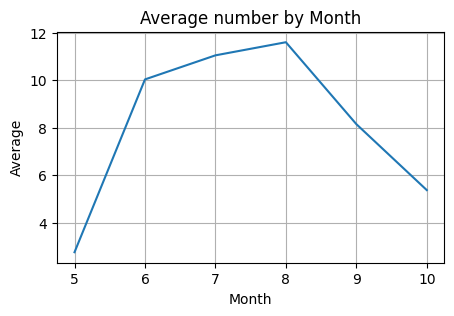

In [79]:
# Set the figure size
plt.figure(figsize=(5,3))

# Visual the number of each month
mosquito_df2.groupby(mosquito_df2['Month'])['Mosquito number'].mean().plot(kind='line', subplots=True)

# Set the visual information and parameters
plt.title('Average number by Month')
plt.ylabel('Average')
plt.grid(True)

Based on the data the average numbers <u>start to rise at the month of May (5) and peak at the highest on August (8); then drop after that month.</u> The highest average noticed is on the month of August. <u>It is possibility to presume at this point that when it get warmer the average numbers goes up and drop when going into the colder season.</u>

In [22]:
# Get the average for all the months (5-10)
mosquito_df2['Month'].mean()

7.621741324213713

### Part 2 - Statistical Analysis

##### Q2.1 - 
##### Is there a statistically significant difference between the  different mosquito species when looking at the  occurence of West Nile Virus?

WNV Presence
Take a look at the values in the column

In [23]:
# Looking at the series of values and check the value counts
mosquito_df2['WNV Present'].value_counts()

0    14501
1     3336
Name: WNV Present, dtype: int64

Take a visual look at the numbers

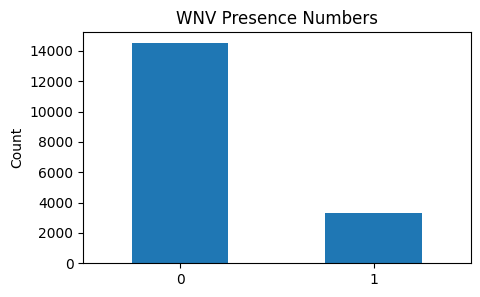

In [24]:
# Visualize the data
plt.figure(figsize=(5,3))
plt.ylabel('Count')
plt.title('WNV Presence Numbers')
mosquito_df2['WNV Present'].value_counts().plot(kind='bar', rot=0)
plt.show()

In [25]:
# Get the numerical counts of each species
mosquito_df2['Species'].value_counts()

CULEX RESTUANS      11387
CULEX PIPIENS        5311
CULEX TERRITANS       917
CULEX SALINARIUS      222
Name: Species, dtype: int64

In [26]:
# Get the breakdown of each species and WNV Present (0- Negative, 1- Positive)
df_t = mosquito_df2[['WNV Present', 'Species']].value_counts()
df_t.groupby(['WNV Present', 'Species']).sum()

WNV Present  Species         
0            CULEX PIPIENS       4074
             CULEX RESTUANS      9309
             CULEX SALINARIUS     215
             CULEX TERRITANS      903
1            CULEX PIPIENS       1237
             CULEX RESTUANS      2078
             CULEX SALINARIUS       7
             CULEX TERRITANS       14
dtype: int64

Looking at the above table that the **CULEX SALINARIUS** <u>only **7** tested positive out of **222 (3%)**</u>.

And the **CULEX TERRITANS** <u>only **14** tested positive out of **917 (1.53%)**.</u>

In [27]:
# Create a DataFrame Species [Positive no., Negative no.]
Species_data = {'CULEX PIPIENS':[1237, 4074], 'CULEX RESTUANS': [2078, 9309], 'CULEX SALINARIUS': [7, 215], 'CULEX TERRITANS': [14, 903] }

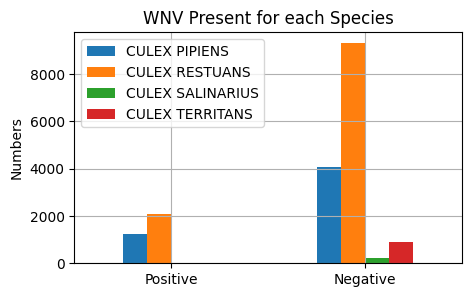

In [28]:
# Create a DataFrame of species and WNV presence
Species_df = pd.DataFrame(Species_data, index=["Positive", "Negative"])

# Visualize the data
Species_df.plot(kind='bar', figsize=(5,3), rot=0)
plt.title('WNV Present for each Species')
plt.ylabel('Numbers')
plt.grid(True)
plt.show()

Looking up at the graph that the **CULEX RESTUANS** has a high occurence of WNV presence; however, the 
ratio is seem too far. The next si the **CULEX PIPIENS** and it has a more closer ratio on the positive and negative presence.

#### Conducting a Hypothesis Test

This is to test if there is a relationship between species and the WNV Presence.

We are declaring our hypothesis:

$H_0$: There is <u>no relationship</u> between the Species variables on the WNV Presence.

$H_1$: There is <u>a relationship</u> between the Species variables on the WNV Presence. (They are not independent)

We are using the **Chi-Squared** test to see if across the species there is a statistical significant relationship
between the categorical values **"Positive" & "Negative**"

stats.chi2_contingency(Species_df) - Output is not easy to read.

Create a function to format the output of "stats.chi2_contingency(Species_df)". To be easily read.

In [29]:
# Create a function for the Chi_Squared Test (chi_contingency)
def chi2_contingency_Func(df, p_limit=0.05):
    ''' Input a dataframe and use the chi2_contingency statistic and p-value.
        And evaluating if the significance level is above or below the the threshold
        Input:
        df - DataFrame
        p_limit - Limit of probability. If you want to change it from the tradition of 0.05.
    '''
    results = stats.chi2_contingency(df)
    print('Chi2 Contingency Results:')
    print(f'Statistic results = {results[0]:.3f}')
    print(f'p-value results = {results[1]}\n')
    
    # To check if the p-value results is above or below the threshold.
    if results[1] < p_limit:
        print(f'The p-value {results[1]} is below the p-value limit of {p_limit}.')
        print(f'Outcome : Reject the null hypotheis and conclude there is significant difference.\n')
    else:
        print(f'The p-value {results[1]} is equal or above the of p_value_limit {p_limit}.')
        print(f'Outcome : Fail to reject the null hypotheis and conclude there is no significant difference.\n')
    array = np.array(results[3])
    print(f'Frequency Array = {array}')

Calling in the created function and passing the Specifies DataFrame and the p_limit value.

In [30]:
# Run the Chi function and input the data frame.
chi2_contingency_Func(Species_df)

Chi2 Contingency Results:
Statistic results = 288.313
p-value results = 3.3649395840995687e-62

The p-value 3.3649395840995687e-62 is below the p-value limit of 0.05.
Outcome : Reject the null hypotheis and conclude there is significant difference.

Frequency Array = [[ 993.30021865 2129.6760666    41.51998654  171.50372821]
 [4317.69978135 9257.3239334   180.48001346  745.49627179]]


**Conclusion:**  
Although the probability is very low and imply that a certain type of species could have
more prevalence of the West Nile Virus. 

However, there could be several other things that could have contribute to it (e.g Months, geographical location, weather, temperature, mosquito gender.

##### Q2.2 - Which columns are positively correlated with the number of mosquitoes caught? Which columns are negatively correlated? Are these correlations statistically significant?

#### Additional Data Preprocessing

In [31]:
# See again the data
mosquito_df2.shape

(17837, 12)

There are categorical variables that needs to be numerically represented.
We will use Pandas 'get_dummies' to set our several categories with one variable used to indicate the
presence or absence for each category.

In [32]:
# Check the shape after converting to dummy variables
pd.get_dummies(mosquito_df2).shape

(17837, 360)

The Data Frame became wide it has 360 columns.

In [33]:
# Get value count
mosquito_df2['Address Block'].value_counts()

100XX W OHARE AIRPORT       1499
41XX N OAK PARK AVE          408
101XX S STONY ISLAND AVE     369
52XX S KOLMAR AVE            349
1XX N CENTRAL PARK DR        335
                            ... 
88XX W HIGGINS RD              2
21XX S HAMLIN AVE              1
4XX W 127TH ST                 1
54XX W PARKER AVE              1
104XX S OGLESBY AVE            1
Name: Address Block, Length: 154, dtype: int64

In [34]:
# Get value count
mosquito_df2['Trap'].value_counts()

T002     406
T114     340
T031     333
T008     326
T138     304
        ... 
T241       1
T135B      1
T040       1
T167       1
T128A      1
Name: Trap, Length: 190, dtype: int64

In [35]:
# Get value count
mosquito_df2['Trap type'].value_counts()

GRAVID      17098
CDC           529
SENTINEL      209
OVI             1
Name: Trap type, dtype: int64

It seems the Trap column is a Trap Id and could be related to the Address Block

In [36]:
# Check if there is a relationship
mosquito_df2[(mosquito_df2['Address Block']=='101XX S STONY ISLAND AVE')].head(5)

,Year,Week,Address Block,Trap,Trap type,Date,Mosquito number,WNV Present,Species,Lat,Lon,Month
15144,2007,29,101XX S STONY ISLAND AVE,T138,CDC,2007-07-25,50,0,CULEX PIPIENS,41.710542,-87.584559,7
15151,2007,29,101XX S STONY ISLAND AVE,T138,CDC,2007-07-25,42,0,CULEX PIPIENS,41.710542,-87.584559,7
15159,2007,29,101XX S STONY ISLAND AVE,T138,CDC,2007-07-19,25,0,CULEX RESTUANS,41.710542,-87.584559,7
15160,2007,29,101XX S STONY ISLAND AVE,T138,CDC,2007-07-19,50,0,CULEX PIPIENS,41.710542,-87.584559,7
15179,2007,29,101XX S STONY ISLAND AVE,T138,CDC,2007-07-19,4,0,CULEX TERRITANS,41.710542,-87.584559,7


In [37]:
# Check if there is a relationship between 101XX S STONY ISLAND AVE and 'NOT' Trap T138
mosquito_df2[(mosquito_df2['Address Block']=='101XX S STONY ISLAND AVE') & (mosquito_df2['Trap'] != 'T138') & (mosquito_df2['Trap'] != 'T138B')]

,Year,Week,Address Block,Trap,Trap type,Date,Mosquito number,WNV Present,Species,Lat,Lon,Month


There could be an association of the Trap to the Address Block. Need to check this further.

There is a 154 of the Address Block and 190 of the Trap as our dummy variable. The Address Block is granular
and it would be better to aggregate up to City and not as street information. Thus for this model only, I decided not to include these. So will discard the Address Block and Trap.

In [38]:
# Dropping the Address Block and Trap.
mosquito_df2.drop('Address Block', axis=1, inplace=True)
mosquito_df2.drop('Trap', axis=1, inplace=True)

In [39]:
# Convert to dummy variables and place it to the DataFrame.
mosquito_dummy2 = pd.get_dummies(mosquito_df2)

#Sanity Check.
mosquito_dummy2.head(5)

,Year,Week,Date,Mosquito number,WNV Present,Lat,Lon,Month,Trap type_CDC,Trap type_GRAVID,Trap type_OVI,Trap type_SENTINEL,Species_CULEX PIPIENS,Species_CULEX RESTUANS,Species_CULEX SALINARIUS,Species_CULEX TERRITANS
15479,2007,21,2007-05-29,1,0,41.892220,-87.691698,5,1,0,0,0,0,1,0,0
15480,2007,21,2007-05-29,1,0,41.732428,-87.631056,5,1,0,0,0,1,0,0,0
15481,2007,21,2007-05-29,2,0,41.921705,-87.666963,5,0,1,0,0,0,1,0,0
15482,2007,21,2007-05-29,1,0,41.688193,-87.676873,5,0,1,0,0,0,1,0,0
15483,2007,21,2007-05-29,2,0,41.891513,-87.609785,5,0,1,0,0,0,1,0,0


In [40]:
# Sanity Check.
mosquito_dummy2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17837 entries, 15479 to 18204
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Year                      17837 non-null  int64         
 1   Week                      17837 non-null  int64         
 2   Date                      17837 non-null  datetime64[ns]
 3   Mosquito number           17837 non-null  int64         
 4   WNV Present               17837 non-null  int64         
 5   Lat                       17837 non-null  float64       
 6   Lon                       17837 non-null  float64       
 7   Month                     17837 non-null  int64         
 8   Trap type_CDC             17837 non-null  uint8         
 9   Trap type_GRAVID          17837 non-null  uint8         
 10  Trap type_OVI             17837 non-null  uint8         
 11  Trap type_SENTINEL        17837 non-null  uint8         
 12  Species_CULEX 

In [41]:
# Redundant checking of the mmosquito_df2.info()
mosquito_dummy2.shape

(17837, 16)

There are 17,837 rows and 16 columns. Now we have all the numeric data.

### Part 3 - Advanced Statistical Analysis

##### Modeling the data


Pulling out the dependent and independent variable. Our dependent variable will
be the WNV Present

In [42]:
# Dropping our dependent variable and leave all our independent variable and assign to X.
X = mosquito_dummy2.drop('WNV Present', axis=1)

# Assign our dependent variable to 'y'.
y = mosquito_df2['WNV Present'].copy()

In [43]:
# Calculate all correlation between each independent variable
corr_df = X.corr(numeric_only=False)

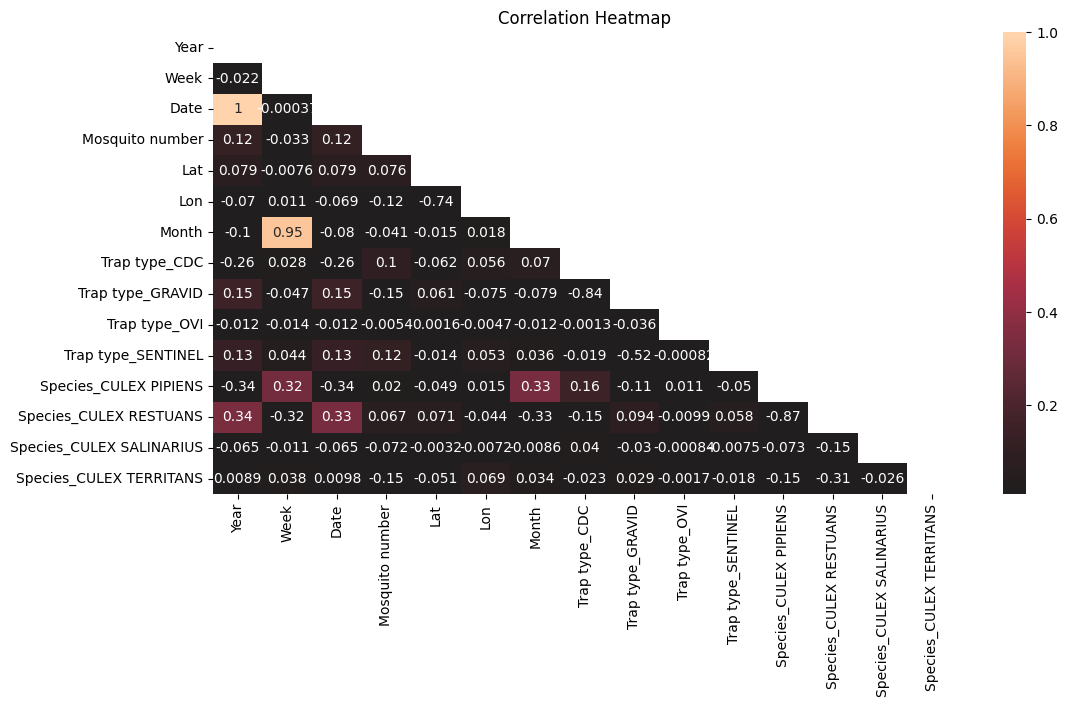

In [44]:
import seaborn as sn

# Set the figure size of the plot
plt.figure(figsize=(12, 6))

# Mask use to filter out the redundant info.
mask = np.triu(np.ones_like(corr_df, dtype=bool))

# Visual the data using a heatmap
sn.heatmap(corr_df, mask=mask, annot=True,vmax=1, vmin=0.01, center=0)
plt.title('Correlation Heatmap')
plt.show()

#### Which columns are positively correlated with the number of mosquitoes caught? 
#### Which columns are negatively correlated? Are these correlations statistically significant?

The Species CULEX PIPIENS have moderate correlation between the Month (0.33) and
Week (0.32). The CULEX RESTUANS have a correlation of 0.34 for the Year and 0.33 for the date. The Month and Week have a high correlation.
which is expected.

However, the above may have highly correlated (multi-collinear) created by one-hot encoding
and could cause a Dummy Variable Trap.

I decided to drop which has the lowest value count.
- CULEX SALINARIUS : 222
- OVI : 1

**Note:** The **Date** is causing an error in the Linear regression. I decided to drop this since it is too granular.
The Week, Month and Year would be sufficient enough.

In [45]:
# Dropping the specified variables.
X = mosquito_dummy2.drop(columns=['Trap type_OVI', 'Species_CULEX SALINARIUS', 'Date', 'WNV Present'], axis=1)

In [46]:
# Sanity check if the desired columns to be removed are dropped.
X.head(3)

,Year,Week,Mosquito number,Lat,Lon,Month,Trap type_CDC,Trap type_GRAVID,Trap type_SENTINEL,Species_CULEX PIPIENS,Species_CULEX RESTUANS,Species_CULEX TERRITANS
15479,2007,21,1,41.892220,-87.691698,5,1,0,0,0,1,0
15480,2007,21,1,41.732428,-87.631056,5,1,0,0,1,0,0
15481,2007,21,2,41.921705,-87.666963,5,0,1,0,0,1,0


Seem the columns are dropped.

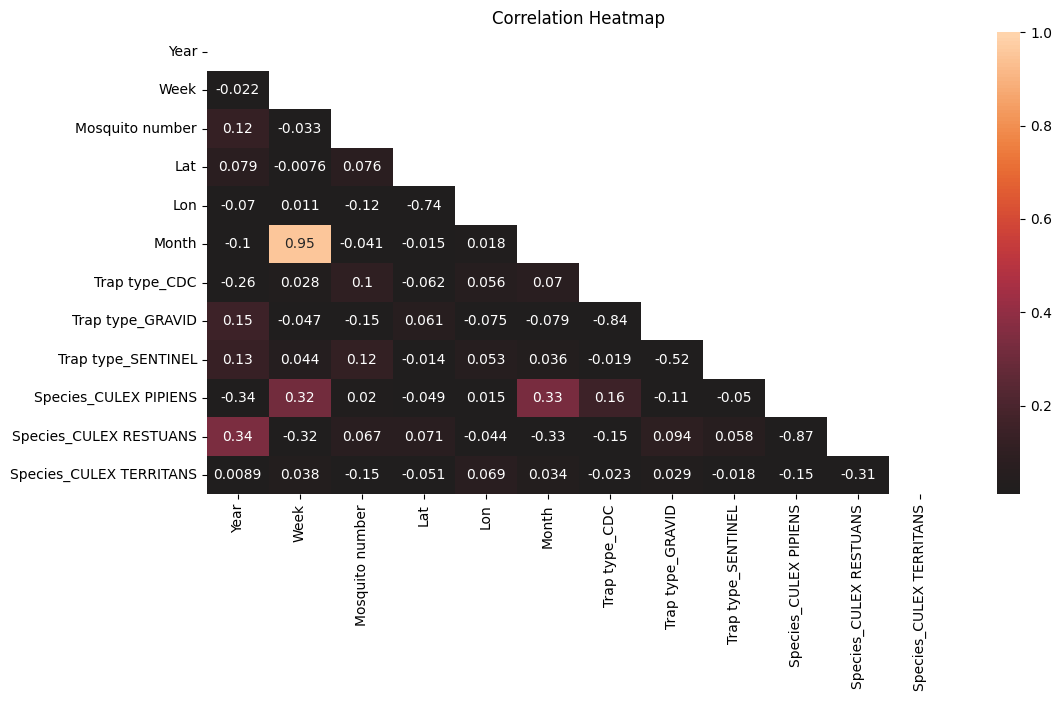

In [47]:
# Get correlation
corr_df = X.corr(numeric_only=False)

# Set the figure size of the plot
plt.figure(figsize=(12, 6))

# Mask use to filter out the redundant info.
mask = np.triu(np.ones_like(corr_df, dtype=bool))

# Visual the data using a heatmap
sn.heatmap(corr_df, mask=mask, annot=True,vmax=1, vmin=0.01, center=0)
plt.title('Correlation Heatmap')
plt.show()

The dropping of the dummy variable have no significant change in the correlation values.

#### Running a Linear Regression

In [48]:
# Importing the required module
import statsmodels.api as sm

In [49]:
# Add a constant
X_withconstant = sm.add_constant(X)

In [50]:
# Sanity Check
X_withconstant.head(3)

,const,Year,Week,Mosquito number,Lat,Lon,Month,Trap type_CDC,Trap type_GRAVID,Trap type_SENTINEL,Species_CULEX PIPIENS,Species_CULEX RESTUANS,Species_CULEX TERRITANS
15479,1.0,2007,21,1,41.892220,-87.691698,5,1,0,0,0,1,0
15480,1.0,2007,21,1,41.732428,-87.631056,5,1,0,0,1,0,0
15481,1.0,2007,21,2,41.921705,-87.666963,5,0,1,0,0,1,0


I keep all the species since on the heatmap removing the CULEX SALINARIUS have so little effect.

In [51]:
# 1. Initiate Linear Model
Lin_regression = sm.OLS(y, X_withconstant)

# 2. Fit Model (Returns a separate object with the parameters)
Lin_regression_results = Lin_regression.fit()

# 3. Summary Result
Lin_regression_results.summary(title='OLS Regression Results - Possible Dummy Trap')

<class 'statsmodels.iolib.summary.Summary'>
"""
                 OLS Regression Results - Possible Dummy Trap                 
==============================================================================
Dep. Variable:            WNV Present   R-squared:                       0.203
Model:                            OLS   Adj. R-squared:                  0.202
Method:                 Least Squares   F-statistic:                     377.4
Date:                Mon, 17 Jul 2023   Prob (F-statistic):               0.00
Time:                        09:24:08   Log-Likelihood:                -6492.0
No. Observations:               17837   AIC:                         1.301e+04
Df Residuals:                   17824   BIC:                         1.311e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     -27.2568      3.248     -8.392      0.000     -33.623     -20.890
Year                        0.0118      0.001     14.696      0.000       0.010       0.013
Week                        0.0092      0.002      4.654      0.000       0.005       0.013
Mosquito number             0.0111      0.000     53.753      0.000       0.011       0.012
Lat                         0.0585      0.034      1.732      0.083      -0.008       0.125
Lon                        -0.0073      0.042     -0.171      0.864      -0.091       0.076
Month                       0.0315      0.009      3.667      0.000       0.015       0.048
Trap type_CDC              -0.1174      0.349     -0.337      0.736      -0.801       0.566
Trap type_GRAVID           -0.0775      0.348     -0.222      0.824      -0.760       0.606
Trap type_SENTINEL         -0.0999      0.349     -0.286      0.775      -0.785       0.585
Species_CULEX PIPIENS       0.0582      0.024      2.427      0.015       0.011       0.105
Species_CULEX RESTUANS      0.0206      0.024      0.866      0.386      -0.026       0.067
Species_CULEX TERRITANS    -0.0623      0.026     -2.382      0.017      -0.114      -0.011
==============================================================================
Omnibus:                     2764.138   Durbin-Watson:                   0.844
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4221.753
Skew:                           1.144   Prob(JB):                         0.00
Kurtosis:                       3.664   Cond. No.                     2.51e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.51e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The Year, Week, Month, Mosquito number, Lat & some Species (**CULEX PIPIENS and CULEX RESTUANS**) has a positive correlation coefficient and the rest are negative. The $R^2$ is only 0.202 which is low. 
Saying 20% variation in the WVN Present can be explained by other variables.

Reading the p-value associated with each variable. 

* Lat, Lon
* Trap Type CDC, GRAVID, SENTINEL
* Species CULEX RESTUANS

Dont seem significant in predicting the WNV Present which p-values > 0.05.

The interpretation of each variable are as follows. Assuming all other variable
stays constant.

* With one unit increase in **Year** there is **0.0118 increase in WNV Present**.
  
* With one unit increase in **Week** there is **0.0092 increase in WNV Present**.
  
* With one unit increase in **Mosquito number** there is **0.0111 increase in WNV Present**.
  
* With one unit increase in **Lat** there is **0.0585 increase in WNV Present**.

* With one unit increase in **Lon** there is **0.0073 decrease in WNV Present**.
  
* With one unit increase in **Month** there is **0.0315 increase in WNV Present**.
  
* With one unit increase in **Trap type_CDC** there is **0.1174 decrease in WNV Present**.

And so on.... (Answer to Q2.2 - Which columns are positive or negative correlated?)

The output says that the a condition number (**Cond. No.**) that is large (**2.51e+06**).
That there might be a <u>strong multicollinearity or other numerical problems in the data</u>.


Decided to drop the Trap and see if there is a difference. As I assume there is no
logical effect that a type of trap could affect the WVN Present.

And to see if there are changes in the variables coefficient, p-values and/or the $R^2$ value.

In [52]:
# Dropping the specified variables.
X = mosquito_dummy2.drop(columns=['Trap type_CDC', 'Trap type_GRAVID', 'Trap type_SENTINEL','Trap type_OVI', 'Date', 'WNV Present'], axis=1)

On the above code the keep repeating and writing down the columns to be drop.
So I can easily see what are being drop and later do a sanity check.

In [53]:
# Sanity check if properly dropped.
X.head(3)

,Year,Week,Mosquito number,Lat,Lon,Month,Species_CULEX PIPIENS,Species_CULEX RESTUANS,Species_CULEX SALINARIUS,Species_CULEX TERRITANS
15479,2007,21,1,41.892220,-87.691698,5,0,1,0,0
15480,2007,21,1,41.732428,-87.631056,5,1,0,0,0
15481,2007,21,2,41.921705,-87.666963,5,0,1,0,0


In [54]:
# Add a constant
X_withconstant = sm.add_constant(X)

# 1. Initiate Linear Model
Lin_regression = sm.OLS(y, X_withconstant)

# 2. Fit Model (Returns a separate object with the parameters)
Lin_regression_results = Lin_regression.fit()

# 3. Summary Result
Lin_regression_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            WNV Present   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.202
Method:                 Least Squares   F-statistic:                     502.3
Date:                Mon, 17 Jul 2023   Prob (F-statistic):               0.00
Time:                        09:24:08   Log-Likelihood:                -6495.5
No. Observations:               17837   AIC:                         1.301e+04
Df Residuals:                   17827   BIC:                         1.309e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                      -22.8054      2.557     -8.919      0.000     -27.817     -17.793
Year                         0.0121      0.001     15.537      0.000       0.011       0.014
Week                         0.0095      0.002      4.836      0.000       0.006       0.013
Mosquito number              0.0110      0.000     54.167      0.000       0.011       0.011
Lat                          0.0588      0.034      1.741      0.082      -0.007       0.125
Lon                         -0.0129      0.042     -0.304      0.761      -0.096       0.070
Month                        0.0298      0.009      3.474      0.001       0.013       0.047
Species_CULEX PIPIENS       -5.6472      0.639     -8.840      0.000      -6.899      -4.395
Species_CULEX RESTUANS      -5.6840      0.640     -8.883      0.000      -6.938      -4.430
Species_CULEX SALINARIUS    -5.7072      0.639     -8.925      0.000      -6.961      -4.454
Species_CULEX TERRITANS     -5.7670      0.639     -9.022      0.000      -7.020      -4.514
==============================================================================
Omnibus:                     2767.749   Durbin-Watson:                   0.844
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4229.519
Skew:                           1.145   Prob(JB):                         0.00
Kurtosis:                       3.666   Cond. No.                     4.01e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.51e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

The output result, after removing the Traps types, is interesting and also confusing.
The $R^2$ is still the same.

However, the p-values, except for the Lat and Lon, is less than 0.05.
Reading the coefficients, a one unit increase in any species there is a decrease in the WNV Present. Which is unusual.

For any one unit increase in Year, Week, Month and Mosquito numbers has a positive correlation.
Also the Lat and Lon may offer also insight as where are the areas the WNV Present mosquito is found.

#### Running a Logistic Regression

In [55]:
# Importing the required module.
import statsmodels.api as sm

In [56]:
# Saving the independent variable.
# Assign X_log0 to signify Model 1.0
# Below variable could have a dummy trap!
X_log0 = mosquito_dummy2.drop(columns=['WNV Present', 'Date'], axis=1)

# Saving the dependent variable to 'y'. Just repeat it here again for ease of debugging.
y = mosquito_df2['WNV Present']

In [57]:
# Sanity check if the WNV is dropped
X_log0.head(3)

,Year,Week,Mosquito number,Lat,Lon,Month,Trap type_CDC,Trap type_GRAVID,Trap type_OVI,Trap type_SENTINEL,Species_CULEX PIPIENS,Species_CULEX RESTUANS,Species_CULEX SALINARIUS,Species_CULEX TERRITANS
15479,2007,21,1,41.892220,-87.691698,5,1,0,0,0,0,1,0,0
15480,2007,21,1,41.732428,-87.631056,5,1,0,0,0,1,0,0,0
15481,2007,21,2,41.921705,-87.666963,5,0,1,0,0,0,1,0,0


The WNV Present is dropped.

In [58]:
print(y)

15479    0
15480    0
15481    0
15482    0
15483    0
        ..
17904    1
17977    1
17997    1
18144    1
18204    1
Name: WNV Present, Length: 17837, dtype: int64


The row is still the same (17,837)

In [59]:
# Adding a constant
X_withconstant_Log0 = sm.add_constant(X_log0)

In [60]:
# Sanity check
X_withconstant_Log0.head(3)

,const,Year,Week,Mosquito number,Lat,Lon,Month,Trap type_CDC,Trap type_GRAVID,Trap type_OVI,Trap type_SENTINEL,Species_CULEX PIPIENS,Species_CULEX RESTUANS,Species_CULEX SALINARIUS,Species_CULEX TERRITANS
15479,1.0,2007,21,1,41.892220,-87.691698,5,1,0,0,0,0,1,0,0
15480,1.0,2007,21,1,41.732428,-87.631056,5,1,0,0,0,1,0,0,0
15481,1.0,2007,21,2,41.921705,-87.666963,5,0,1,0,0,0,1,0,0


If you noticed all the dummies are present. Thus a dummy trap could occur.
I will run this and compare later with a particular dummy removed.

The date is causing an error.

In [61]:
# Instantiate the logistic regression model 1.0 - With Dummy Trap!
Log_regression_0 = sm.Logit(y, X_withconstant_Log0)

# Fit the model (this returns a separate object with the parameters)
Log_regression_results_0 = Log_regression_0.fit()

# Display the results 
Log_regression_results_0.summary(title='Logit Regression Result - Possible Dummy Trap 1.0')

         Current function value: 0.381494
         Iterations: 35


C:\Users\jprna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
              Logit Regression Result - Possible Dummy Trap 1.0               
==============================================================================
Dep. Variable:            WNV Present   No. Observations:                17837
Model:                          Logit   Df Residuals:                    17823
Method:                           MLE   Df Model:                           13
Date:                Mon, 17 Jul 2023   Pseudo R-squ.:                  0.2083
Time:                        09:24:08   Log-Likelihood:                -6804.7
converged:                      False   LL-Null:                       -8595.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     -189.1563    2.8e+06  -6.76e-05      1.000   -5.49e+06    5.48e+06
Year                         0.1140      0.007     15.599      0.000       0.100       0.128
Week                         0.1014      0.017      5.975      0.000       0.068       0.135
Mosquito number              0.0658      0.002     43.254      0.000       0.063       0.069
Lat                          0.3065      0.294      1.042      0.298      -0.270       0.883
Lon                         -0.3091      0.360     -0.858      0.391      -1.015       0.397
Month                        0.2222      0.073      3.042      0.002       0.079       0.365
Trap type_CDC              -41.3403   3.29e+06  -1.26e-05      1.000   -6.45e+06    6.45e+06
Trap type_GRAVID           -41.0237   3.29e+06  -1.25e-05      1.000   -6.45e+06    6.45e+06
Trap type_OVI              -65.3599   3.58e+06  -1.82e-05      1.000   -7.02e+06    7.02e+06
Trap type_SENTINEL         -41.4324   3.29e+06  -1.26e-05      1.000   -6.45e+06    6.45e+06
Species_CULEX PIPIENS      -46.2911   7.97e+05  -5.81e-05      1.000   -1.56e+06    1.56e+06
Species_CULEX RESTUANS     -46.5938   7.97e+05  -5.84e-05      1.000   -1.56e+06    1.56e+06
Species_CULEX SALINARIUS   -47.5712   7.97e+05  -5.97e-05      1.000   -1.56e+06    1.56e+06
Species_CULEX TERRITANS    -48.7002   7.97e+05  -6.11e-05      1.000   -1.56e+06    1.56e+06
============================================================================================
"""

Based on the above output that the p-values of Year, Week, Month is significant less than 0.05.
The Trap and Species are not significant. Also to note the latter has a negative correlation.

##### Another Regression test removing the dummy variables.

In [62]:
# Dropping the same dummy variables as noted in the Linear Regression
X_log1 = mosquito_dummy2.drop(columns=['Trap type_OVI', 'Species_CULEX SALINARIUS', 'Date', 'WNV Present'], axis=1)

X_log1 removes the Trap type_OVI, Species_CULEX SALINARIUS, Date and 'WNV Present'. -Remove the Dummy Trap

In [63]:
# Adding constants
X_withconstant_Log1 = sm.add_constant(X_log1)

In [64]:
# Sanity Check
X_withconstant_Log1.head(3)

,const,Year,Week,Mosquito number,Lat,Lon,Month,Trap type_CDC,Trap type_GRAVID,Trap type_SENTINEL,Species_CULEX PIPIENS,Species_CULEX RESTUANS,Species_CULEX TERRITANS
15479,1.0,2007,21,1,41.892220,-87.691698,5,1,0,0,0,1,0
15480,1.0,2007,21,1,41.732428,-87.631056,5,1,0,0,1,0,0
15481,1.0,2007,21,2,41.921705,-87.666963,5,0,1,0,0,1,0


In [65]:
# Instantiate the logistic regression model 1.1
Log_regression_1 = sm.Logit(y, X_withconstant_Log1)

# Fit the model (this returns a separate object with the parameters)
Log_regression_results_1 = Log_regression_1.fit()

# Display the results 
Log_regression_results_1.summary(title='Logit Regression Results - No Dummy Trap 1.1')

         Current function value: 0.381494
         Iterations: 35


C:\Users\jprna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Logit Regression Results - No Dummy Trap 1.1                 
==============================================================================
Dep. Variable:            WNV Present   No. Observations:                17837
Model:                          Logit   Df Residuals:                    17824
Method:                           MLE   Df Model:                           12
Date:                Mon, 17 Jul 2023   Pseudo R-squ.:                  0.2083
Time:                        09:24:08   Log-Likelihood:                -6804.7
converged:                      False   LL-Null:                       -8595.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    -289.7350   2972.475     -0.097      0.922   -6115.678    5536.208
Year                        0.1140      0.007     15.599      0.000       0.100       0.128
Week                        0.1014      0.017      5.975      0.000       0.068       0.135
Mosquito number             0.0658      0.002     43.254      0.000       0.063       0.069
Lat                         0.3065      0.294      1.042      0.298      -0.270       0.883
Lon                        -0.3091      0.360     -0.858      0.391      -1.015       0.397
Month                       0.2222      0.073      3.042      0.002       0.079       0.365
Trap type_CDC              11.6673   2972.347      0.004      0.997   -5814.026    5837.361
Trap type_GRAVID           11.9839   2972.347      0.004      0.997   -5813.710    5837.678
Trap type_SENTINEL         11.5751   2972.347      0.004      0.997   -5814.119    5837.269
Species_CULEX PIPIENS       1.2800      0.397      3.228      0.001       0.503       2.057
Species_CULEX RESTUANS      0.9774      0.396      2.468      0.014       0.201       1.754
Species_CULEX TERRITANS    -1.1291      0.479     -2.358      0.018      -2.067      -0.191
===========================================================================================
"""

The above output have better sense. 
The **Year, Week, Mosquito number** and **Month** <u>is significant less than 0.05.</u>
Noticed that the CULEX TERRITANS has a negative correlation.

The **Trap type is insignificant** which seem logical. And the **Type of mosquito species** <u>may also be significant (< 0.05).</u>

##### Another Regression Test removing all the trap

In [66]:
# Dropping the same dummy variables as noted in the Linear Regression
X_log2 = mosquito_dummy2.drop(columns=['Trap type_OVI','Trap type_CDC','Trap type_GRAVID', 'Trap type_SENTINEL', 'Species_CULEX SALINARIUS', 'Date', 'WNV Present'], axis=1)

In [67]:
X_log2.head(3)

,Year,Week,Mosquito number,Lat,Lon,Month,Species_CULEX PIPIENS,Species_CULEX RESTUANS,Species_CULEX TERRITANS
15479,2007,21,1,41.892220,-87.691698,5,0,1,0
15480,2007,21,1,41.732428,-87.631056,5,1,0,0
15481,2007,21,2,41.921705,-87.666963,5,0,1,0


All the traps type are removed.

In [68]:
# Adding constants
X_withconstant_Log2 = sm.add_constant(X_log2)

In [69]:
# Sanity Check
X_withconstant_Log2.head(3)

,const,Year,Week,Mosquito number,Lat,Lon,Month,Species_CULEX PIPIENS,Species_CULEX RESTUANS,Species_CULEX TERRITANS
15479,1.0,2007,21,1,41.892220,-87.691698,5,0,1,0
15480,1.0,2007,21,1,41.732428,-87.631056,5,1,0,0
15481,1.0,2007,21,2,41.921705,-87.666963,5,0,1,0


In [70]:
# Instantiate the logistic regression model 1.2
Log_regression_2 = sm.Logit(y, X_withconstant_Log1)

# Fit the model (this returns a separate object with the parameters)
Log_regression_results_2 = Log_regression_2.fit()

# Display the results 
Log_regression_results_2.summary(title='Logit Regression Results - Trap type removed 1.2')

         Current function value: 0.381494
         Iterations: 35


C:\Users\jprna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
               Logit Regression Results - Trap type removed 1.2               
==============================================================================
Dep. Variable:            WNV Present   No. Observations:                17837
Model:                          Logit   Df Residuals:                    17824
Method:                           MLE   Df Model:                           12
Date:                Mon, 17 Jul 2023   Pseudo R-squ.:                  0.2083
Time:                        09:24:09   Log-Likelihood:                -6804.7
converged:                      False   LL-Null:                       -8595.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    -289.7350   2972.475     -0.097      0.922   -6115.678    5536.208
Year                        0.1140      0.007     15.599      0.000       0.100       0.128
Week                        0.1014      0.017      5.975      0.000       0.068       0.135
Mosquito number             0.0658      0.002     43.254      0.000       0.063       0.069
Lat                         0.3065      0.294      1.042      0.298      -0.270       0.883
Lon                        -0.3091      0.360     -0.858      0.391      -1.015       0.397
Month                       0.2222      0.073      3.042      0.002       0.079       0.365
Trap type_CDC              11.6673   2972.347      0.004      0.997   -5814.026    5837.361
Trap type_GRAVID           11.9839   2972.347      0.004      0.997   -5813.710    5837.678
Trap type_SENTINEL         11.5751   2972.347      0.004      0.997   -5814.119    5837.269
Species_CULEX PIPIENS       1.2800      0.397      3.228      0.001       0.503       2.057
Species_CULEX RESTUANS      0.9774      0.396      2.468      0.014       0.201       1.754
Species_CULEX TERRITANS    -1.1291      0.479     -2.358      0.018      -2.067      -0.191
===========================================================================================
"""

The output removing the  trap type is almost close and coefficient direction.
For any unit increase in the Mosquito number, CULEX PIPIENS and CULEX RESTUANS there is possible increase
in the WNV Present to be positive. However, in the CULEX TERRITANS there is a negative correlation. This needs further investigation.

Also the Year could contribute and may have to check other information (e.g Global Climate, Temperature changes in the Year).
It is also interesting on the weeks too as it might suggest occurence of WNV by season.

### Conclusion:

The **Linear Regression** <u>failed poorly because it could not find a better line of fit</u>. Because most of the numerical data
is binary. After converting some categories into numerical. It suggest it needs more data points to run the method
of least square.

The **Logistic Regression** has a better output. After converting the category to binary and removing a possible dummy trap.
<u>The data has alot of binary numbers (1 or 0) thus it performs better because it take advantage of the **Sigmond curve**.</u>

Thus it is important to check if the variables are continuously independent variables or categorical.